## Regression
Regression Analysis is a form of prediction modeling technique that
investigate the relationship dependant variable and independant 
variable.

There are many types of regression -

- Linear Regression

When there is a single independant variable (x), the method is referred to as 
simple linear regression. When there are multiple independant variables, the method as 
multiple linear regression.

Linear regression is a linear model, e.g. a model that assumes a linear relationship
between the input variables (x) and the single output variable (y)

- Logistic Regression

logistic regression we can solve classification problems where we are trying
to predict discrete values.

- Polyonomial regression

In [1]:
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
dataset = pd.read_csv('sample_data/student_scores.csv')
df_tips = sns.load_dataset('tips')

In [7]:
dataset.sample(5)

,Hours,Scores
0,2.5,21
12,4.5,41
19,7.4,69
15,8.9,95
21,4.8,54


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


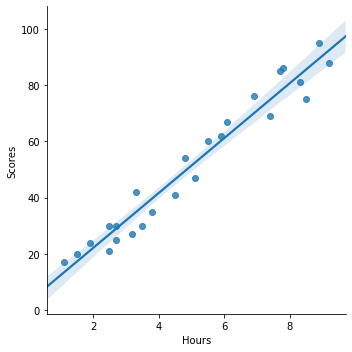

In [9]:
# sns.lmplot(x='Hours', y='Scores', data=dataset, fit_reg=True)
# plt.title('Hours vs Percentage')
# plt.xlabel('Hours Studied')
# plt.ylabel('Percentage Score')

sns.lmplot(x="Hours", y='Scores', data=dataset)

In [14]:
from sklearn.model_selection import train_test_split
x = dataset.iloc[:, 0:1] ## independant -> dataframe  dataset[['Hours']]
y = dataset['Scores']  ## dependant -> array/series

# type(x)
# x= df_tips.iloc[:,0:1] ## total_bill -> df_tips[['total_bill']]


# y= df_tips['tip'] ## tip

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
regressor.intercept_  ##c

2.018160041434683

In [20]:
regressor.coef_  ## the slope -> m

array([9.91065648])

In [22]:
y_pred = regressor.predict(x_test)

In [24]:

df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
df_n = pd.concat([x_test,df], axis=1, sort=False)
df_n

,Hours,Actual Score,Predicted Score
5,1.5,20,16.884145
2,3.2,27,33.732261
19,7.4,69,75.357018
16,2.5,30,26.794801
11,5.9,62,60.491033


In [25]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


In [26]:
r2_score(y_test,y_pred)

0.9454906892105356

In [27]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [31]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

def variance(values):
    m = mean(values)
    return sum([(x-m)**2 for x in values])

def std(values):
    var = variance(values)
    return var**0.5

In [32]:
y = dataset['Scores']
x = dataset['Hours']

In [41]:
x0 = mean(x)
y0 = mean(y)

In [39]:
def slope(x,y):
    
    l = []
    for i in range(len(x)):
        m = (y0 - y[i])/(x0-x[i])
        l.append(m)
    return mean(l)
        
        
        

In [44]:
m = slope(x,y)

In [48]:
def intercept_():
    return y0 - m*x0
    

In [53]:
c = intercept_()

In [50]:
m

7.877661938385005

In [51]:
## y = 7.87x + 12

In [60]:
y_test = y[:5]
x_test = x[:5]

for i in x_test:
    print(i*m)

19.69415484596251
40.176075885763524
25.208518202832018
66.96012647627255
27.57181678434752


In [61]:
def predict(test_data):
    y_pred = []
    for i in test_data:
        y = m*i + c
        y_pred.append(y)
    return y_pred
        

In [63]:
y_pred = predict(x_test)

In [64]:
df_o = pd.DataFrame({"Actual Score":y_test,"Predicted Score":y_pred})

df_o


,Actual Score,Predicted Score
0,21,31.691313
1,47,52.173234
2,27,37.205677
3,75,78.957285
4,30,39.568975


In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 7.919296803849977
